In [1]:
import sys
import pickle
path: str = '/Users/juanbeta/My Drive/Research/Energy/E-CVRP-TW/Code/'
#path: str = 'C:/Users/jm.betancourt/Documents/Research/Energy//E-CVRP-TW/Code/'

from E_CVRP_TW import  E_CVRP_TW

sys.path.insert(0,path+'Experimentation/')
import plot_performance as plot

# Define instance to evaluate

In [2]:
env = E_CVRP_TW()

# Constructive

### Alpha configuration

Testing various alpha configurations

In [3]:
data = {}
for instance in env.sizes['s']:
    data[instance] = {}
    for alpha in [0.15, 0.3, 0.5, 'Adaptative-Reactive']:
        #data[instance][alpha] = plot.retrieve_const_performance(instance, path+f'Experimentation/Constructive/alpha/{alpha}/')
        try:
            data[instance][alpha] = plot.retrieve_const_performance(instance, path+f'Experimentation/Constructive/alpha/{alpha}/')
        except:
            continue

########## Performance ##########
incumbent: 1637.4986985042906
gap: 156.59%
time to find: 369.329772233963


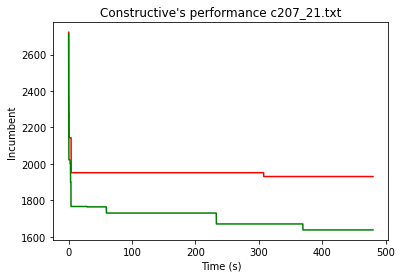

In [4]:
instance = env.sizes['l'][15]
print(f'########## Performance ##########')
print(f'incumbent: {data[instance]["Adaptative-Reactive"]["best distance"]}')
print(f'gap: {round((data[instance]["Adaptative-Reactive"]["best distance"] - env.bkFO[instance])/env.bkFO[instance],4)*100}%')
print(f'time to find: {data[instance]["Adaptative-Reactive"]["time to find"]}')
plot.plot_performance(data[instance],instance)

In [4]:
print('Instance \tM \tgap \tbestEV \tfoundEV')
for instance in env.instances:
    try:
        env.load_data(instance)
        gap = round((data[instance]["Adaptative-Reactive"]["best distance"] - env.bkFO[instance])/env.bkFO[instance],3)
        if gap < 0:
            print(f'{instance} \t{len(env.Costumers)}\t{round(gap*100,2)}% \t{env.bkEV[instance]} \t{len(data[instance]["Adaptative-Reactive"]["best individual"])}')
    except: continue

Instance 	M 	gap 	bestEV 	foundEV
c101C5.txt 	5	-3.0% 	2 	3
c103C5.txt 	5	-5.9% 	1 	2
rc105C5.txt 	5	-0.8% 	2 	3


In [7]:
instance = 'c101C5.txt'
data[instance]['Adaptative-Reactive']['best individual']

print(data[instance]['Adaptative-Reactive']['best individual'])

[['D', 'C12', 'S5', 'C100', 'D'], ['D', 'C30', 'S0', 'C85', 'D'], ['D', 'C64', 'D']]


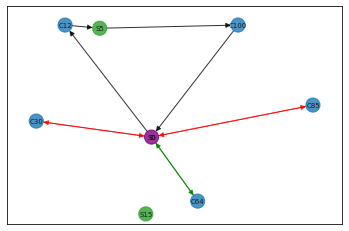

In [8]:
env.load_data(instance)
env.generate_parameters()

env.render(data[instance]['Adaptative-Reactive']['best individual'])